In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

In [61]:
data = pd.read_csv('../data/processed/train_normalized.csv')

data.head()

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,...,Mental_Health_Poor,Sleep_Excessive,Sleep_Insomnia,Sleep_Normal,Education_High School,Education_Postgraduate,Education_Undergraduate,Income_High,Income_Low,Income_Medium
0,0.275255,1.034833,1.037470,0.886932,1.701081,-1.801746,-1.309503,0.821119,-1.685348,-1.036748,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.468750,0.538701,1.207329,0.246577,-0.447021,-0.681807,-0.988497,0.531535,-1.578733,1.494861,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.360965,-1.772009,-1.067962,-1.221225,0.929241,-1.033680,-1.077411,0.526607,-0.648420,1.454120,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.052464,-1.252553,0.785321,-1.363735,0.592362,0.569177,0.187074,2.281748,-0.737829,-0.302987,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.520099,0.108355,0.085250,0.465336,1.024787,-1.121453,-0.799873,0.381138,-0.922682,-0.556389,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [62]:
features = [
    'Cholesterol',
    'Blood_Glucose',
    'Bone_Density',
    'Vision',
    'Hearing',
    'Smoking_Current',
    'Smoking_Former',
    'Smoking_Never',
    'Cognitive_Function',
    'Systolic_BP',
    'Diastolic_BP'
]

In [63]:
data[features+ ['Age']].head(20)

,Cholesterol,Blood_Glucose,Bone_Density,Vision,Hearing,Smoking_Current,Smoking_Former,Smoking_Never,Cognitive_Function,Systolic_BP,Diastolic_BP,Age
0,1.037470,1.701081,-1.801746,-1.309503,0.821119,0.0,1.0,0.0,-1.685348,0.311465,1.353914,1.726825
1,1.207329,-0.447021,-0.681807,-0.988497,0.531535,1.0,0.0,0.0,-1.578733,-0.753337,1.656285,1.143345
2,-1.067962,0.929241,-1.033680,-1.077411,0.526607,0.0,0.0,1.0,-0.648420,0.875183,0.547593,0.802982
3,0.785321,0.592362,0.569177,0.187074,2.281748,0.0,0.0,1.0,-0.737829,-0.815972,-0.157938,-0.072238
4,0.085250,1.024787,-1.121453,-0.799873,0.381138,0.0,1.0,0.0,-0.922682,1.501537,1.051544,1.240592
5,-1.440256,-1.411715,1.135244,0.916343,-1.333050,1.0,0.0,0.0,0.635625,-0.753337,-2.072952,-1.190574
6,0.502091,0.182360,-0.799449,-1.309503,1.140440,1.0,0.0,0.0,-1.345549,2.002620,1.353914,1.094722
7,-0.471803,-0.540404,1.547325,1.157597,-0.522233,0.0,0.0,1.0,1.647002,-0.126983,-1.669791,-1.336444
8,-1.215229,0.568970,0.260408,0.149447,0.494549,0.0,1.0,0.0,0.070987,0.374100,2.361816,-0.169485
9,1.409975,0.186716,-1.377316,-1.309503,1.296552,0.0,1.0,0.0,-0.514182,0.436736,1.353914,1.143345


<Axes: >

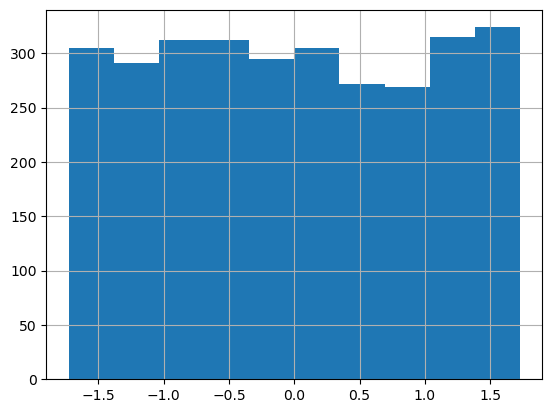

In [64]:
data['Age'].hist()

### Chia tập dữ liệu 70:30

In [65]:
X = data[features]
y = data['Age']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=28)

### chia khoảng cho tuổi

In [67]:
y_train = pd.cut(y_train, bins=5, labels=False)
y_test = pd.cut(y_test, bins=5, labels=False)

### huấn luyện mô hình

In [68]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [69]:
y_pred = model.predict(X_test)

### độ chính xác

In [70]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6533333333333333
Precision: 0.6629173908664943
Recall: 0.6533333333333333
F1 Score: 0.6360638468294716


### vẽ cây quyết định

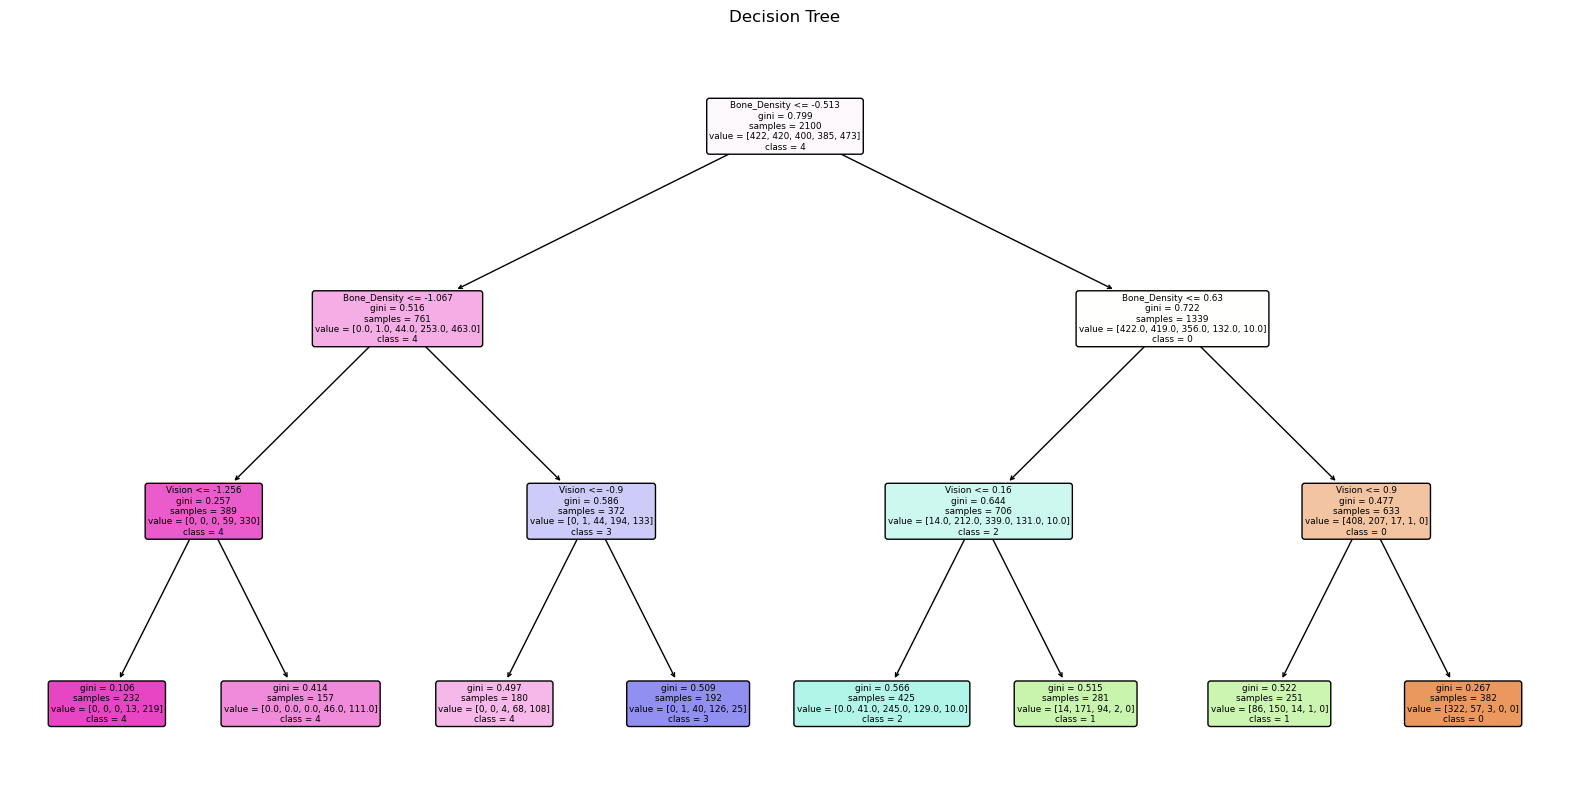

In [71]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=features,
    class_names=[str(cls) for cls in range(5)],
    filled=True,
    rounded=True
)
plt.title("Decision Tree")
plt.show()

### Ma trận nhầm lẫn

[[133  41   0   0   0]
 [ 38 137  29   0   0]
 [  0  68 119  10   3]
 [  0   2  56  42  56]
 [  0   0   3   6 157]]


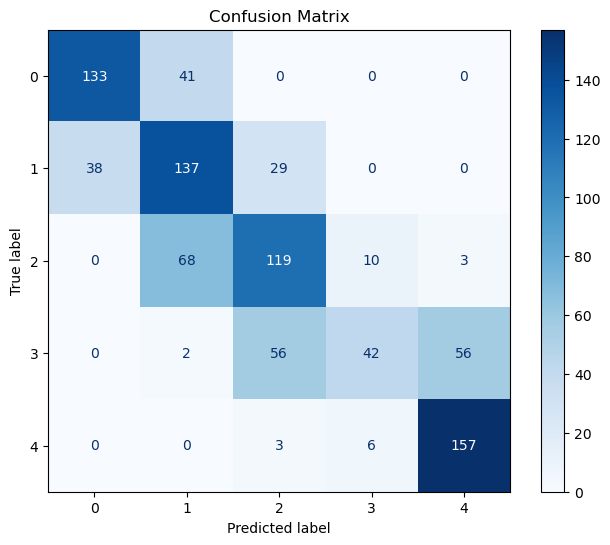

In [72]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(cls) for cls in range(5)])
print(cm)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

### Xem độ quan trọng của các features


Feature Importances:
               Feature  Importance
2         Bone_Density    0.770316
3               Vision    0.229684
0          Cholesterol    0.000000
1        Blood_Glucose    0.000000
4              Hearing    0.000000
5      Smoking_Current    0.000000
6       Smoking_Former    0.000000
7        Smoking_Never    0.000000
8   Cognitive_Function    0.000000
9          Systolic_BP    0.000000
10        Diastolic_BP    0.000000


C:\Users\Illya\AppData\Local\Temp\ipykernel_2272\666565990.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


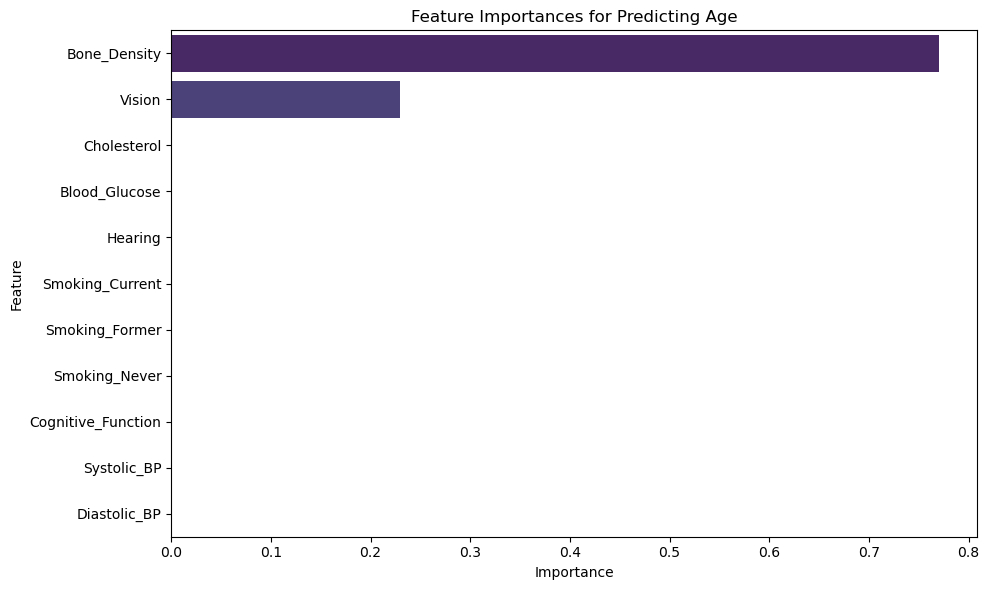

In [73]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances for Predicting Age")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [74]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

### Tạo scorer cho từng metric

In [75]:
mse_scorer = 'neg_mean_squared_error'
mae_scorer = 'neg_mean_absolute_error'
r2_scorer = 'r2'

### Đánh giá mô hình bằng cross_val_score

In [76]:
mse_scores = cross_val_score(model, X, pd.cut(y, bins=5, labels=False), cv=kf, scoring=mse_scorer)
mae_scores = cross_val_score(model, X, pd.cut(y, bins=5, labels=False), cv=kf, scoring=mae_scorer)
r2_scores = cross_val_score(model, X, pd.cut(y, bins=5, labels=False), cv=kf, scoring=r2_scorer)

In [77]:
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)
mae_scores = -mae_scores

In [78]:
print(f"MSE: {mse_scores.mean():.4f} +- {mse_scores.std():.4f}")
print(f"RMSE: {rmse_scores.mean():.4f} +- {rmse_scores.std():.4f}")
print(f"MAE: {mae_scores.mean():.4f} +- {mae_scores.std():.4f}")
print(f"R2: {r2_scores.mean():.4f} +- {r2_scores.std():.4f}") 

MSE: 0.3763 +- 0.0176
RMSE: 0.6133 +- 0.0142
MAE: 0.3537 +- 0.0163
R2: 0.8140 +- 0.0153


### Nhận xét:
- MSE đo lường mức độ sai lệch giữa dự đoán và thực tế, càng về gần 0 thì càng chính xác. Tại đây 0.3763 tạm ổn
- RMSE là căn bậc 2 của MSE. Ta thấy độ lệch chuẩn nhỏ 0.0142 suy ra kết quả ổn định
- MAE là mức độ sai số trung bình tuyệt đối. giá trị thấp cho thấy mô hình dự đoán khá hiệu quả
- R2 là chỉ số đánh giá độ phù hợp của mô hình. Với giá trị mục tiêu là 1 được xem là chuẩn thì giá trị 0.814 cho thấy mô hình có khả năng giải thích 81.4% sự biến thiên trong dữ liệu đầu ra, thể hiện sự hiệu quả